<a href="https://colab.research.google.com/github/Raj-Shriwastav/MyInternshipProjects-ExtionInfotech/blob/Image-Classifaction/Image_Classification_Extion_Infotech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Convolutional Neural Networks for CIFAR-10 Multi-Class Classification


---


>Internship Project From **Extion Infotech**

>Completed By **Raj Shriwastava**

## 1. Basic Setup

### Basic Operations

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import cifar10               # CIFAR-10 is a dataset of 50,000 32x32 labeled, color, training images. Used to train model for CNN.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()  # The function `load_data()` divides the data into two parts: training data and test data.

In [2]:
x_train.shape                 #General Infromation

(50000, 32, 32, 3)

In [3]:
x_train[0].shape              #General Infromation

(32, 32, 3)

### Viewing Data Points

In [4]:
import matplotlib.pyplot as plt         # To view\visualize the individual data points

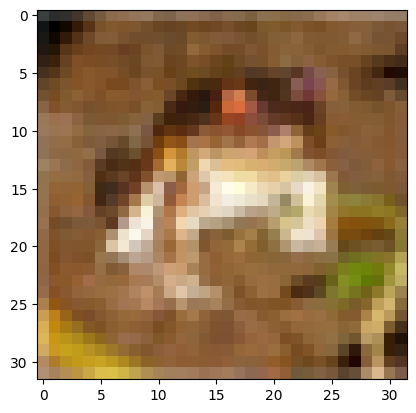

In [5]:
# Frog
plt.imshow(x_train[0])

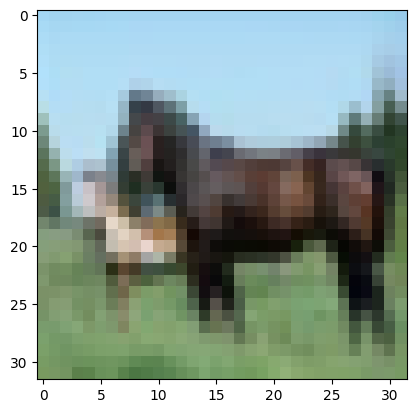

In [6]:
# Horse
plt.imshow(x_train[12])

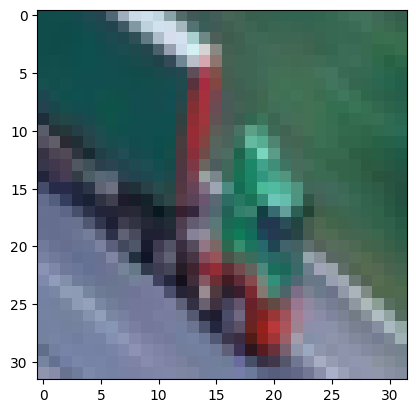

In [7]:
# Truck
plt.imshow(x_train[50])

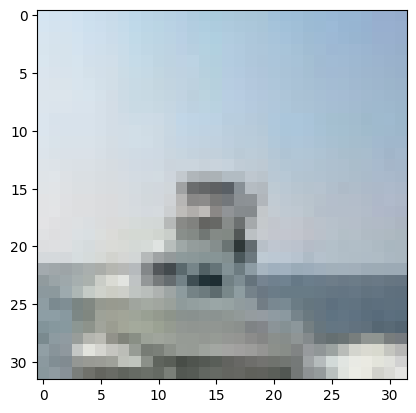

In [8]:
# Ship
plt.imshow(x_train[100])

## 2. Preprocessing

### Preprocessing the labels

In [9]:
print(y_train.shape)    #General Infromation

(50000, 1)


In [10]:
y_train[0]              #General Infromation

array([6], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)                #Converts the labels of the training set y_train into categorical one-hot encoded vectors.
y_cat_train.shape                                       #This retrieves the shape of the resulting one-hot encoded label array for the training set.

(50000, 10)

In [12]:
y_cat_train[0]                  #General Infromation

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [13]:
y_cat_test = to_categorical(y_test,10)                #This line converts the labels of the test set y_test into categorical one-hot encoded format.

*Now the Preprecessing of the labels are completed. Let's do same for Inputs.*

### Preprocessing the Input

In [14]:
x_train[0]        #General Infromation

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
x_train[0].shape

(32, 32, 3)

In [16]:
print(x_train.max())
print(x_train.min())

255
0


In [17]:
x_train = x_train/225           #Performs normalization on the pixel values of the images in the training and test sets.
x_test = x_test/255



---



## 3. Model Definition





### Model Instantiation

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

*Now with this the model is created lets train it on our data.*

### Model Training

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [35]:
model.fit(x_train,y_cat_train,epochs=20,validation_data=(x_test,y_cat_test))     #I am using 20 epoch here for Better Result.

Epoch 1/20
1563/1563 [==============================] - 61s 39ms/step - loss: 0.5226 - accuracy: 0.8214 - val_loss: 1.1333 - val_accuracy: 0.6847
Epoch 2/20
1563/1563 [==============================] - 74s 48ms/step - loss: 0.4807 - accuracy: 0.8362 - val_loss: 1.1819 - val_accuracy: 0.6779
Epoch 3/20
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4513 - accuracy: 0.8466 - val_loss: 1.1875 - val_accuracy: 0.6763
Epoch 4/20
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4167 - accuracy: 0.8572 - val_loss: 1.1974 - val_accuracy: 0.6709
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.3900 - accuracy: 0.8692 - val_loss: 1.4045 - val_accuracy: 0.6688
Epoch 6/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.3647 - accuracy: 0.8769 - val_loss: 1.3452 - val_accuracy: 0.6689
Epoch 7/20
1563/1563 [==============================] - 57s 36ms/step - loss: 0.3450 - accuracy: 0.8832 - val_loss: 1.5810 -

In [36]:
losses = pd.DataFrame(model.history.history)        #This creates a DataFrame containing the training metrics recorded during the training.

### Model Predictions

In [37]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)       #These lines perform model inference on the test data and convert the raw predictions into class labels.

313/313 [==============================] - 3s 11ms/step


### Model Evaluation

In [38]:
model.metrics_names

['loss', 'accuracy']

In [48]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.522599,0.82144,1.133298,0.6847
1,0.480691,0.83620,1.181937,0.6779
2,0.451270,0.84662,1.187528,0.6763
3,0.416655,0.85720,1.197409,0.6709
4,0.389967,0.86918,1.404485,0.6688


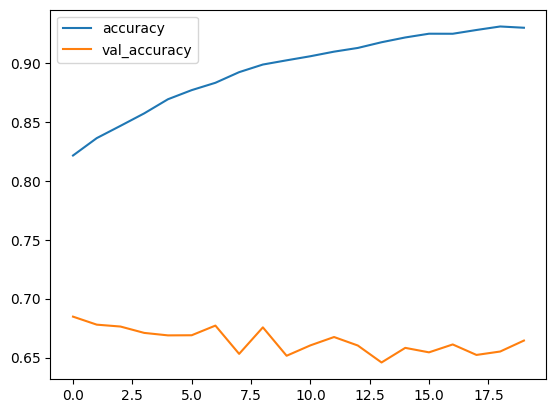

In [40]:
losses[['accuracy','val_accuracy']].plot();

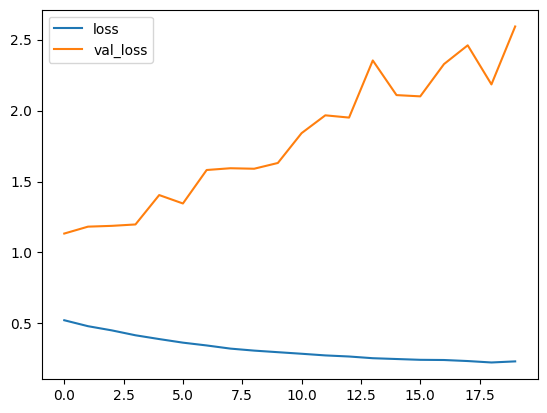

In [41]:
losses[['loss','val_loss']].plot();

In [42]:
model.evaluate(x_test,y_cat_test,verbose=0)

[2.5921268463134766, 0.6643999814987183]

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1000
           1       0.85      0.74      0.79      1000
           2       0.61      0.48      0.54      1000
           3       0.45      0.55      0.49      1000
           4       0.55      0.71      0.62      1000
           5       0.57      0.56      0.56      1000
           6       0.73      0.75      0.74      1000
           7       0.72      0.69      0.71      1000
           8       0.78      0.77      0.77      1000
           9       0.76      0.75      0.76      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.67     10000
weighted avg       0.68      0.66      0.67     10000

[[635  17  66  39  55  10  14  21 106  37]
 [ 24 744   8  24  19  14  20  10  30 107]
 [ 51   8 484 101 138  83  80  33  11  11]
 [ 18  11  58 547  91 139  68  39  11  18]
 [ 10   1  46  90 712  40  39  44  15   3]
 [  9   1  40 235  61 560 

<Axes: >

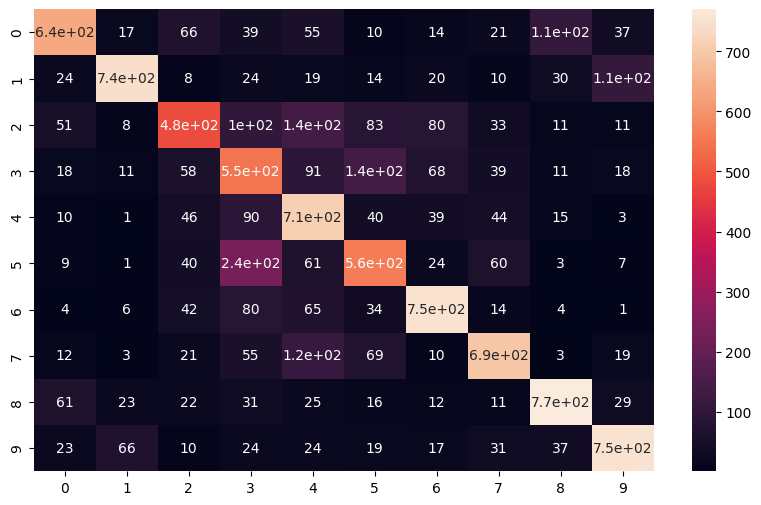

In [44]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

## 4. Custom inputs / Validation.

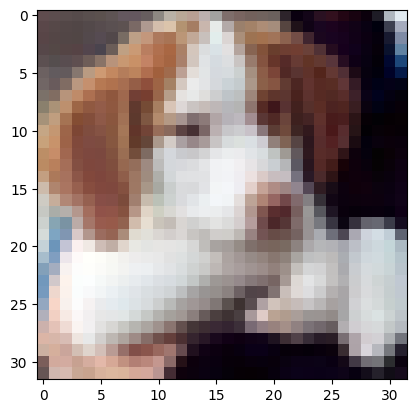

In [45]:
my_image = x_test[16]
plt.imshow(my_image)

In [46]:
my_prediction = model.predict(my_image.reshape(1,32,32,3))
my_prediction = np.argmax(my_prediction, axis=-1)
print(my_prediction)

1/1 [==============================] - 0s 20ms/step
[5]


In [ ]:
# 5 is DOG